# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* Wind speed appears to be fairly evenly distributed . However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.
* Greater than 50 percent of 

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
#create lists which will store values for each city
#Headers are: City	Cloudiness	Country	Date	Humidity	Lat	Lng	Max Temp	Wind Speed
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxtemp = []
windspeed = []

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#loop through cities and append response key values to respective lists
for city in cities:
    response = requests.get(base_url + "appid=" + api_key + "&units=imperial&q=" + city).json()
    print(city)
   #query_url = base_url + "appid=" + api_key + "&q=" + city
    try:
        cityname.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
    except KeyError:
        print ("Error")  




puerto ayora
lebu
yellowknife
butaritari
kaitangata
norman wells
mataura
upernavik
barentsburg
Error
busselton
cape town
solwezi
saldanha
agirish
lalomanu
Error
sao joao da barra
souillac
pevek
ahuimanu
lavrentiya
tuktoyaktuk
barrow
qaanaaq
pisco
tahoua
tautira
jagatsinghapur
iqaluit
rikitea
nikolskoye
pafos
Error
albany
hilo
chokurdakh
cervo
goderich
huanan
dingle
hermanus
new norfolk
bathsheba
saint-philippe
cidreira
tasiilaq
thompson
mogadishu
barcelos
atambua
khatanga
tselinnoye
vao
kovdor
bourail
samusu
Error
ushuaia
makokou
arraial do cabo
illoqqortoormiut
Error
cherskiy
attawapiskat
Error
kuche
Error
hobart
sioux lookout
bilibino
rovaniemi
lagoa
brae
dikson
atuona
portland
brownfield
bethel
fairbanks
victoria
hay river
kralendijk
iwanai
east london
punta arenas
bluff
mindelo
los llanos de aridane
charyshskoye
lincoln
miyazu
srednekolymsk
berlevag
port blair
broome
herat
kamenka
jamestown
adrar
hobyo
ponta do sol
nioki
pacific grove
westport
beringovskiy
sciacca
road town
geraldt

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
#file_one_df.to_csv("Output/fileOne.csv", index=False, header=True)
#weather_df.to_csv(r'C:\Users\salaz\Desktop\My Git\output_data.csv', index=False, header=True)
#create dataframe of above lists
citiesdict = {"City":cityname, "Cloudiness":cloudiness, "Country":country, "Date":date, "Humidity":humidity, "Lat":lat, "Lng":lng, "Max Temp":maxtemp, "Wind Speed":windspeed}
citiesdf = pd.DataFrame(citiesdict)
#write to csv
citiesdf.to_csv(r":/weatherpy.csv", index=False, header=True)

OSError: [Errno 22] Invalid argument: ':/weatherpy.csv'

In [5]:
#display data frame
citiesdf.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

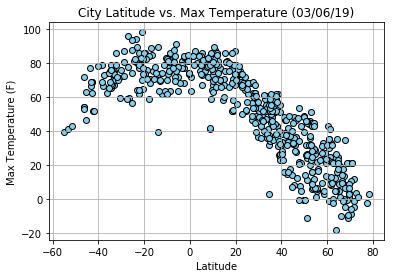

In [46]:
#plot max temp
plt.scatter(lat, maxtemp, color="skyblue", alpha=1, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (03/06/19)")
plt.grid()
plt.savefig("latvstemp")
plt.show()

#### Latitude vs. Humidity Plot

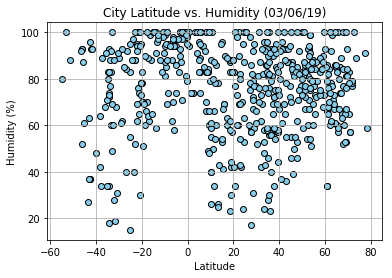

In [47]:
#plot humidity
plt.scatter(lat, humidity, color="skyblue", alpha=1, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (03/06/19)")
plt.grid()
plt.savefig("latvshum")
plt.show()

#### Latitude vs. Cloudiness Plot

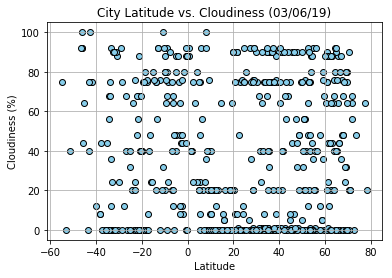

In [48]:
#plot cloudiness
plt.scatter(lat, cloudiness, color="skyblue", alpha=1, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (03/06/19)")
plt.grid()
plt.savefig("latvsclouds")
plt.show()

#### Latitude vs. Wind Speed Plot

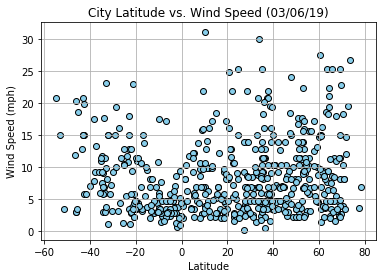

In [49]:
#plot wind speed
plt.scatter(lat, windspeed, color="skyblue", alpha=1, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (03/06/19)")
plt.grid()
plt.savefig("latvswind")
plt.show()